Arewa Data Science Academy
Deep Learning Cohort2.0
Name: Faisal Muhammad Adam
Email: faisaladamm@gmail.com
Title: Week 2 Solution


Q1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

For consistency,

*   The dataset should have 1000 samples and a random_state=42.
*   
Turn the data into PyTorch tensors.

*   Split the data into training and test sets using train_test_split with 80% training and 20% testing.









In [4]:
import sklearn.datasets as datasets

def generate_moon_data():
    sample_count = 1000
    seed = 42

    features, labels = datasets.make_moons(
        n_samples=sample_count,
        noise=0.07,
        random_state=seed
    )

    return features[:5], labels[:5]

# Generate and show the data
X_sample, y_sample = generate_moon_data()
X_sample, y_sample

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483]]),
 array([1, 1, 1, 1, 0]))

I used a seaborn to visualizethe contents and below are the code snippet

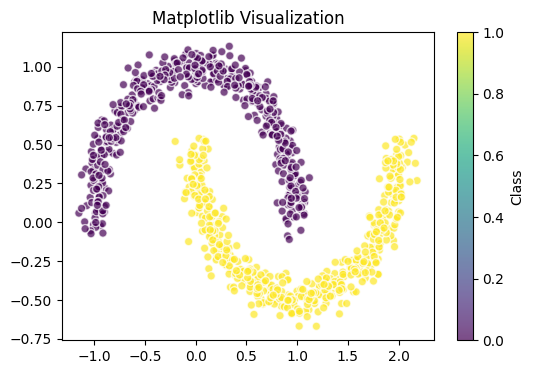

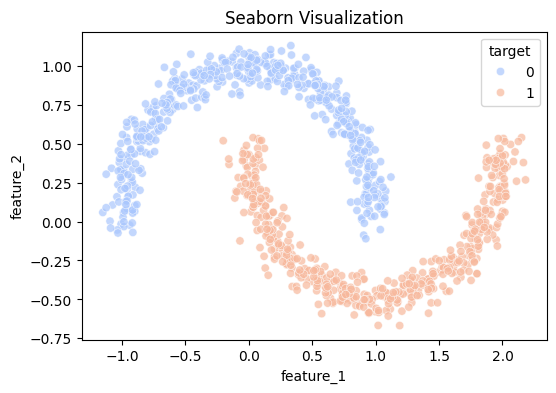

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import pandas as pd

# 1. Generate and prepare data
X, y = make_moons(n_samples=1000, noise=0.07, random_state=42)
df = pd.DataFrame({'feature_1': X[:, 0], 'feature_2': X[:, 1], 'target': y})

# 2. Matplotlib version
plt.figure(figsize=(6, 4))
plt.scatter(
    x=df['feature_1'],
    y=df['feature_2'],
    c=df['target'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='w'
)
plt.title('Matplotlib Visualization')
plt.colorbar(label='Class')
plt.show()

# 3. Seaborn version
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x='feature_1',
    y='feature_2',
    hue='target',
    palette='coolwarm',
    alpha=0.7,
    edgecolor='w'
)
plt.title('Seaborn Visualization')
plt.show()

In [13]:

# Split into train/test (stratified by y to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
    stratify=y_np
)


# Print split summary
print(f"Training samples: {len(X_train)} ({len(X_train)/NUM_SAMPLES:.0%})")
print(f"Test samples: {len(X_test)} ({len(X_test)/NUM_SAMPLES:.0%})")
print("\nFirst 5 training samples:")
print(train_df.head())

Training samples: 800 (80%)
Test samples: 200 (20%)

First 5 training samples:
   feature_1  feature_2  target    set
0   0.304051  -0.246249       1  train
1   0.551775   0.777669       0  train
2   2.021661   0.192267       1  train
3  -0.916380   0.074567       0  train
4   1.974122   0.206224       1  train


Q2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in Q1.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MoonClassifier(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=10, output_dim=1):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # Input layer
            nn.ReLU(),                         # Non-linear activation
            nn.Linear(hidden_dim, hidden_dim),  # Hidden layer
            nn.Tanh(),                         # This is an additional Non-linear activation and it will help in smoothening the decision boundary
            nn.Linear(hidden_dim, output_dim)  # Output layer
        )

    def forward(self, x):
        return self.layer_stack(x)

# Initialize model
model = MoonClassifier()

# Print model architecture
print(model)

MoonClassifier(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Tanh()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [21]:
# Set up training parameters
loss_fn = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


def train_model(model, X, y, epochs=1000):
    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X)
        y_pred = torch.sigmoid(y_logits)

        # Calculate loss
        loss = loss_fn(y_logits, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item():.4f}")

# Train the model
train_model(model, X_train_tensor, y_train_tensor)

Epoch: 0 | Loss: 0.0000
Epoch: 100 | Loss: 0.0000
Epoch: 200 | Loss: 0.0000
Epoch: 300 | Loss: 0.0000
Epoch: 400 | Loss: 0.0000
Epoch: 500 | Loss: 0.0000
Epoch: 600 | Loss: 0.0000
Epoch: 700 | Loss: 0.0000
Epoch: 800 | Loss: 0.0000
Epoch: 900 | Loss: 0.0000


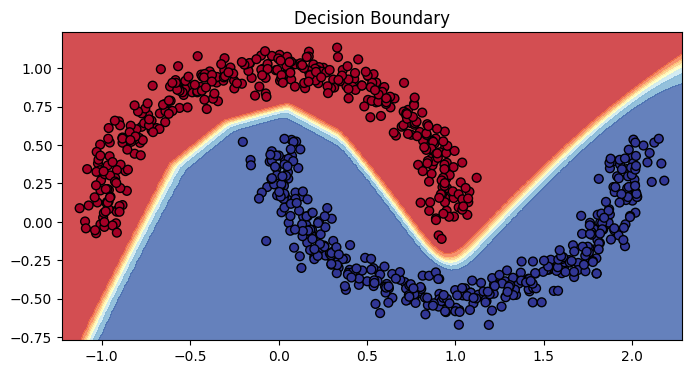

In [19]:
def plot_decision_boundary(model, X, y):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                           torch.linspace(y_min, y_max, 100))

    # Make predictions
    model.eval()
    with torch.inference_mode():
        Z = model(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1))
        Z = torch.sigmoid(Z).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

# Visualize results
plot_decision_boundary(model, X_train_tensor, y_train_tensor)

Q3. Setup a binary classification compatible loss function and optimizer to use when training the model built in Q2

In [23]:
import torch.optim as optim

# Initialize model
model = MoonClassifier()

# Binary classification compatible components:
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with built-in sigmoid
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adaptive learning rate optimizer
def train_model(model, X_train, y_train, X_test, y_test, epochs=1000):
    # Convert data to tensors
    X_train_tensor = torch.from_numpy(X_train).float()
    y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)  # Add extra dimension
    X_test_tensor = torch.from_numpy(X_test).float()
    y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(1)

    # Training loop
    for epoch in range(epochs):
        # Training mode
        model.train()

        # Forward pass
        y_logits = model(X_train_tensor)
        loss = loss_fn(y_logits, y_train_tensor)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluation mode
        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test_tensor)
            test_loss = loss_fn(test_logits, y_test_tensor)
            y_probs = torch.sigmoid(test_logits)
            y_preds = torch.round(y_probs)
            accuracy = (y_preds == y_test_tensor).float().mean()

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f} | Test Acc: {accuracy.item():.2%}")

# Run training
train_model(model, X_train, y_train, X_test, y_test)

Epoch: 0 | Loss: 0.6841 | Test Loss: 0.6696 | Test Acc: 71.00%
Epoch: 100 | Loss: 0.0582 | Test Loss: 0.0499 | Test Acc: 99.00%
Epoch: 200 | Loss: 0.0055 | Test Loss: 0.0057 | Test Acc: 100.00%
Epoch: 300 | Loss: 0.0023 | Test Loss: 0.0026 | Test Acc: 100.00%
Epoch: 400 | Loss: 0.0013 | Test Loss: 0.0016 | Test Acc: 100.00%
Epoch: 500 | Loss: 0.0008 | Test Loss: 0.0012 | Test Acc: 100.00%
Epoch: 600 | Loss: 0.0006 | Test Loss: 0.0009 | Test Acc: 100.00%
Epoch: 700 | Loss: 0.0004 | Test Loss: 0.0007 | Test Acc: 100.00%
Epoch: 800 | Loss: 0.0003 | Test Loss: 0.0006 | Test Acc: 100.00%
Epoch: 900 | Loss: 0.0003 | Test Loss: 0.0005 | Test Acc: 100.00%


Q4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1

Epoch: 0 | Train Loss: 0.7266 | Test Loss: 0.7041 | Test Acc: 50.00%
Epoch: 100 | Train Loss: 0.0880 | Test Loss: 0.0727 | Test Acc: 97.50%
Epoch: 200 | Train Loss: 0.0064 | Test Loss: 0.0058 | Test Acc: 100.00%
Epoch: 300 | Train Loss: 0.0024 | Test Loss: 0.0025 | Test Acc: 100.00%
Epoch: 400 | Train Loss: 0.0013 | Test Loss: 0.0015 | Test Acc: 100.00%
Epoch: 500 | Train Loss: 0.0008 | Test Loss: 0.0011 | Test Acc: 100.00%
Epoch: 600 | Train Loss: 0.0006 | Test Loss: 0.0008 | Test Acc: 100.00%
Epoch: 700 | Train Loss: 0.0004 | Test Loss: 0.0006 | Test Acc: 100.00%
Epoch: 800 | Train Loss: 0.0003 | Test Loss: 0.0005 | Test Acc: 100.00%
Epoch: 900 | Train Loss: 0.0003 | Test Loss: 0.0004 | Test Acc: 100.00%


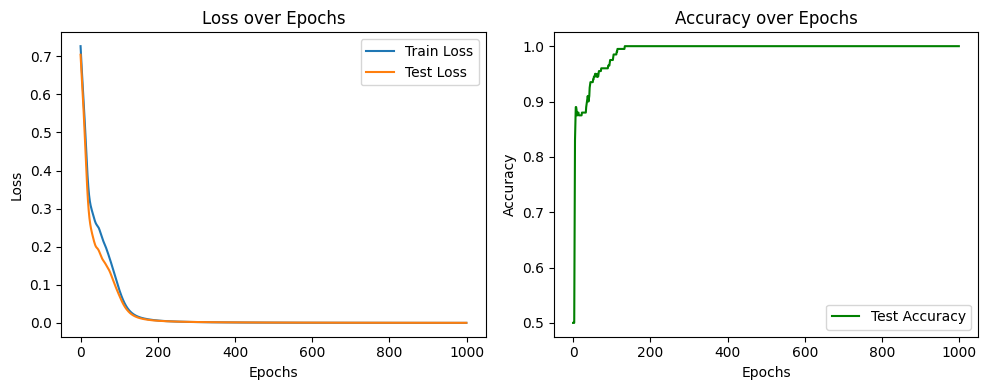


Final Test Accuracy: 100.00%


In [25]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Prepare the data (from previous steps)
X_train_tensor = torch.from_numpy(X_train).type(torch.float32)
y_train_tensor = torch.from_numpy(y_train).type(torch.float32).unsqueeze(1)  # Add extra dimension
X_test_tensor = torch.from_numpy(X_test).type(torch.float32)
y_test_tensor = torch.from_numpy(y_test).type(torch.float32).unsqueeze(1)

# 2. Initialize model, loss and optimizer
model = MoonClassifier()
loss_fn = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with sigmoid built-in
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 3. Training and testing loop
def train_and_test(model, X_train, y_train, X_test, y_test, epochs=1000):
    # Track metrics
    train_loss_history = []
    test_loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        # Training phase
        model.train()

        # Forward pass
        y_train_logits = model(X_train)
        y_train_pred = torch.round(torch.sigmoid(y_train_logits))

        # Calculate loss
        train_loss = loss_fn(y_train_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Testing phase
        model.eval()
        with torch.inference_mode():
            # Forward pass
            y_test_logits = model(X_test)
            y_test_pred = torch.round(torch.sigmoid(y_test_logits))

            # Calculate metrics
            test_loss = loss_fn(y_test_logits, y_test)
            accuracy = accuracy_score(y_test.numpy(), y_test_pred.numpy())

            # Store metrics
            train_loss_history.append(train_loss.item())
            test_loss_history.append(test_loss.item())
            accuracy_history.append(accuracy)

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss.item():.4f} | Test Loss: {test_loss.item():.4f} | Test Acc: {accuracy:.2%}")

    return train_loss_history, test_loss_history, accuracy_history

# 4. Run the training
train_losses, test_losses, accuracies = train_and_test(
    model,
    X_train_tensor,
    y_train_tensor,
    X_test_tensor,
    y_test_tensor,
    epochs=1000
)

# 5. Plot results
plt.figure(figsize=(10, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Test Accuracy", color="green")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# 6. Evaluate final performance
model.eval()
with torch.inference_mode():
    y_test_pred = torch.round(torch.sigmoid(model(X_test_tensor)))
    final_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred.numpy())
    print(f"\nFinal Test Accuracy: {final_accuracy:.2%}")

Q5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

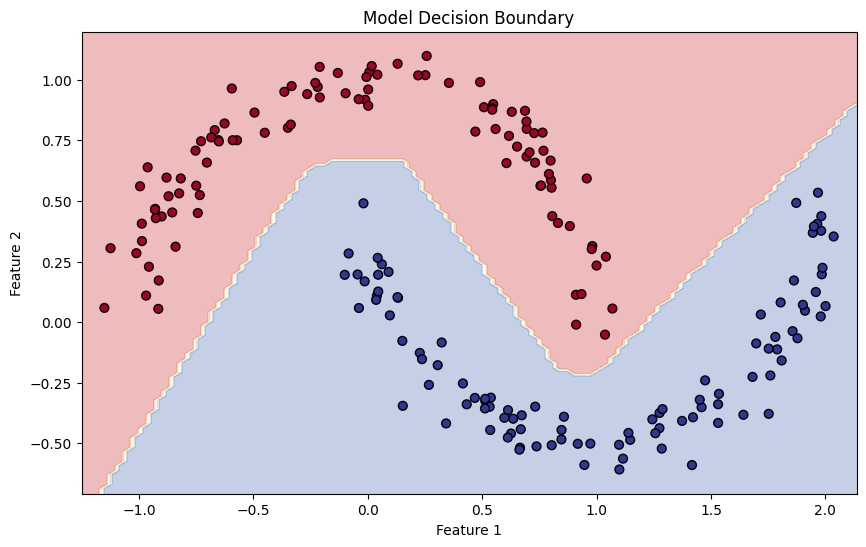


First 10 predictions:
Predicted | Actual
-----------------
       1 | 1
       0 | 0
       0 | 0
       0 | 0
       1 | 1
       1 | 1
       1 | 1
       1 | 1
       0 | 0
       0 | 0


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Convert to PyTorch tensors
    mesh_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(mesh_tensor)
        y_probs = torch.sigmoid(y_logits)
        y_pred = torch.round(y_probs)

    # Reshape and plot
    Z = y_pred.reshape(xx.shape).numpy()

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title("Model Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Convert numpy arrays to tensors if not already done
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# Plot decision boundary on test set
plot_decision_boundary(model, X_test, y_test)

# Make predictions on test set
model.eval()
with torch.inference_mode():
    y_logits = model(X_test_tensor)
    y_probs = torch.sigmoid(y_logits)
    y_preds = torch.round(y_probs)

# Print first 10 predictions vs actual
print("\nFirst 10 predictions:")
print("Predicted | Actual")
print("-----------------")
for i in range(10):
    print(f"{int(y_preds[i].item()):8} | {int(y_test_tensor[i].item())}")

Q6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

Implementation matches native tanh: True
Maximum difference: 1.19e-07


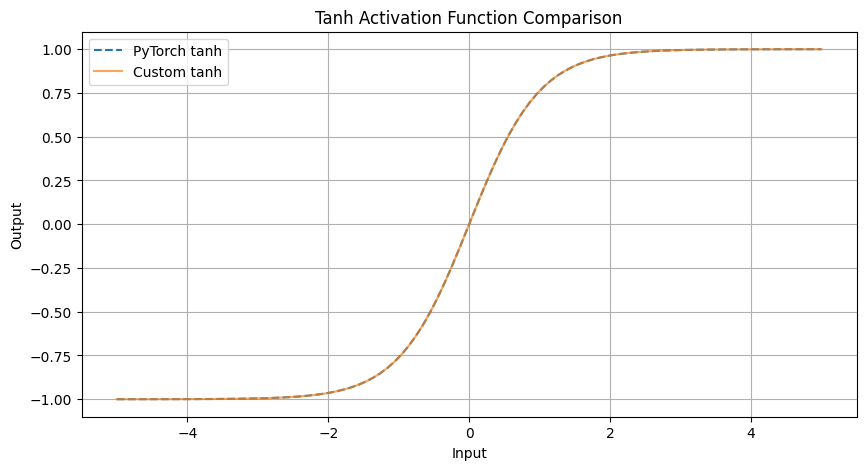

In [27]:
import torch

def custom_tanh(z: torch.Tensor) -> torch.Tensor:
    """Hyperbolic tangent activation function implemented in pure PyTorch.

    Args:
        z: Input tensor of any shape

    Returns:
        Tensor of same shape as input with tanh activation applied
    """
    return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))

# Verification against PyTorch's native tanh
def verify_tanh_implementation():
    # Create test tensor
    test_input = torch.linspace(-5, 5, 100)

    # Compute both versions
    native_tanh = torch.tanh(test_input)
    our_tanh = custom_tanh(test_input)

    # Check equivalence
    close_match = torch.allclose(native_tanh, our_tanh, atol=1e-6)
    max_diff = torch.max(torch.abs(native_tanh - our_tanh))

    print(f"Implementation matches native tanh: {close_match}")
    print(f"Maximum difference: {max_diff.item():.2e}")

    # Plot comparison
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot(test_input.numpy(), native_tanh.numpy(), label='PyTorch tanh', linestyle='--')
    plt.plot(test_input.numpy(), our_tanh.numpy(), label='Custom tanh', alpha=0.7)
    plt.title("Tanh Activation Function Comparison")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Verify our implementation
verify_tanh_implementation()

Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

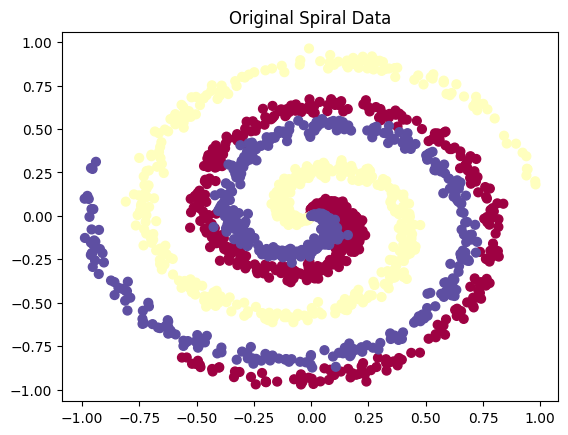

Epoch: 0 | Loss: 1.1157 | Test Loss: 1.0947 | Test Acc: 39.00%
Epoch: 100 | Loss: 0.1909 | Test Loss: 0.2468 | Test Acc: 93.67%
Epoch: 200 | Loss: 0.0508 | Test Loss: 0.1200 | Test Acc: 96.67%
Epoch: 300 | Loss: 0.0296 | Test Loss: 0.1007 | Test Acc: 97.33%
Epoch: 400 | Loss: 0.0230 | Test Loss: 0.0965 | Test Acc: 97.67%
Epoch: 500 | Loss: 0.0190 | Test Loss: 0.1036 | Test Acc: 97.67%
Epoch: 600 | Loss: 0.0189 | Test Loss: 0.1087 | Test Acc: 97.33%
Epoch: 700 | Loss: 0.0147 | Test Loss: 0.1093 | Test Acc: 97.33%
Epoch: 800 | Loss: 0.0133 | Test Loss: 0.1112 | Test Acc: 97.67%
Epoch: 900 | Loss: 0.0133 | Test Loss: 0.1201 | Test Acc: 97.33%
Epoch: 1000 | Loss: 0.0112 | Test Loss: 0.1227 | Test Acc: 97.33%
Epoch: 1100 | Loss: 0.0112 | Test Loss: 0.1331 | Test Acc: 97.00%
Epoch: 1200 | Loss: 0.0103 | Test Loss: 0.1323 | Test Acc: 97.00%
Epoch: 1300 | Loss: 0.0097 | Test Loss: 0.1346 | Test Acc: 97.00%
Epoch: 1400 | Loss: 0.0555 | Test Loss: 0.1193 | Test Acc: 95.33%
Epoch: 1500 | Loss: 0.

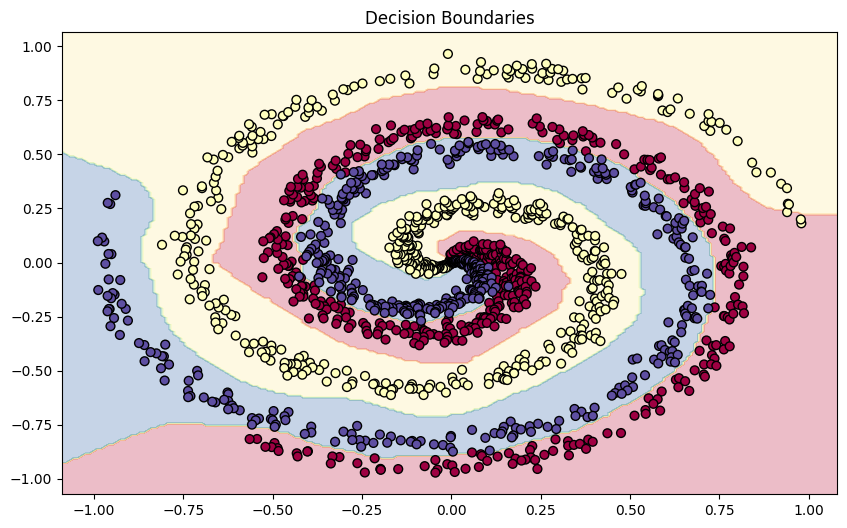


Final Test Accuracy: 97.67%


In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Spirals Data Creation (adapted from CS231n)
def create_spirals(n_samples=300, n_classes=3, noise=0.05):
    X = np.zeros((n_samples*n_classes, 2))
    y = np.zeros(n_samples*n_classes, dtype='uint8')

    for class_number in range(n_classes):
        ix = range(n_samples*class_number, n_samples*(class_number+1))
        r = np.linspace(0.0, 1, n_samples)
        t = np.linspace(class_number*4, (class_number+1)*4, n_samples) + np.random.randn(n_samples)*noise
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number

    return X, y

# Create and visualize data
X, y = create_spirals(n_samples=500, n_classes=3, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Original Spiral Data")
plt.show()

# 2. Data Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).type(torch.float32)
y_train_tensor = torch.from_numpy(y_train).type(torch.long)
X_test_tensor = torch.from_numpy(X_test).type(torch.float32)
y_test_tensor = torch.from_numpy(y_test).type(torch.long)

# 3. Model Construction
class SpiralClassifier(torch.nn.Module):
    def __init__(self, input_dim=2, hidden_dim=100, output_dim=3):
        super().__init__()
        self.layer_stack = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.layer_stack(x)

model = SpiralClassifier()

# 4. Loss and Optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 5. Training Loop
def train_model(model, X_train, y_train, X_test, y_test, epochs=2000):
    for epoch in range(epochs):
        model.train()
        y_logits = model(X_train)
        loss = loss_fn(y_logits, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            model.eval()
            with torch.inference_mode():
                test_logits = model(X_test)
                test_loss = loss_fn(test_logits, y_test)
                test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
                test_acc = accuracy_score(y_test, test_preds)

            print(f"Epoch: {epoch} | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc:.2%}")

train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

# 6. Decision Boundary Plotting
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    model.eval()
    with torch.inference_mode():
        Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
        Z = torch.softmax(Z, dim=1).argmax(dim=1).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Decision Boundaries")
    plt.show()

plot_decision_boundary(model, X, y)

# Final Evaluation
model.eval()
with torch.inference_mode():
    y_preds = torch.softmax(model(X_test_tensor), dim=1).argmax(dim=1)
    final_acc = accuracy_score(y_test_tensor, y_preds)
    print(f"\nFinal Test Accuracy: {final_acc:.2%}")